# <center>Customer Relationship Management Case</center>

### Sobre a empresa

A empresa é uma empresa bem estabelecida que opera no setor de varejo de alimentos. Atualmente, ela tem cerca de várias centenas de milhares de clientes cadastrados e atendem quase um milhão de consumidores por ano. Eles vendem produtos de 5 categorias principais: vinhos, produtos de carne rara, frutas exóticas, peixes especialmente preparados e produtos doces. Estes podem ainda ser divididos em ouro e produtos regulares. Os clientes podem encomendar e adquirir produtos através de 3 canais de venda: lojas físicas, catálogos e site da empresa. Globalmente, a empresa teve receitas sólidas e um resultado saudável nos últimos 3 anos, mas as perspectivas de crescimento do lucro para os próximos 3 anos não são promissoras. Por isso, várias iniciativas estratégicas estão sendo consideradas para reverter essa situação. Uma delas é melhorar o desempenho das atividades de marketing, com foco especial nas campanhas de marketing.

### O Departamento de Marketing
   O departamento de marketing foi pressionado a gastar seu orçamento anual com mais sabedoria. O head da área percebe a importância de ter uma abordagem baseada nas análises dos dados para tomada de decisões, razão pela qual uma pequena equipe de cientistas de dados foi contratada com um objetivo claro em mente: construir um modelo preditivo que dê suporte as iniciativas de marketing. O sucesso dessas atividades provará o valor da abordagem e convencerá os mais céticos dentro da empresa.


### Objetive 
   O objetivo da equipe é construir um modelo preditivo que produza o maior lucro para a próxima campanha de marketing, programada para o próximo mês. A nova campanha, a sexta, visa a venda de um novo gadget. Para construir o modelo, foi realizada uma campanha piloto envolvendo 2.240 clientes. Os clientes foram selecionados aleatoriamente e contatados por telefone para aquisição do gadget. Nos meses seguintes, os clientes que compraram a oferta foram devidamente rotulados. O custo total da campanha de amostra foi de 6.720M e a receita gerada pelos clientes que aceitaram a oferta foi de 3.674M. A campanha teve um lucro de -3.046M. A taxa de sucesso da campanha foi de 15%. O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes. O modelo permitirá que a empresa escolha os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o head está interessado em entender os comportamentos dos clientes que estão dispostos a comprar o gadget.


### Data
   O conjunto de dados contém características sociodemográficas e firmográficas de cerca de 2.240 clientes que foram contactados. Além disso, contém uma tag para os clientes que responderam à campanha, comprando o produto.

### Descrição das colunas do conjunto de dados:

* **ID:** Identificação do cliente
* **Year_Birth:** Ano de nascimento do cliente
* **AcceptedCmp1:** 1 se o cliente aceitou a oferta na 1a campanha,  O caso contrário
* **AcceptedCmp2:** 1 se o cliente aceitou a oferta na 2a campanha, O caso contrário
* **AceitoCmp3:** 1 se o cliente aceitou a oferta na 3a campanha, O caso contrário
* **AceitoCmp4:** 1 se o cliente aceitou a oferta na 4a campanha, O caso contrário
* **AceitoCmp5:** 1 se custo mer aceitou a oferta na 5a campanha, 0 caso contrário
* **Response:** 1 se o cliente aceitou a oferta na última campanha, O caso contrário
* **Complain:** 1 se o cliente reclamou nos últimos 2 anos
* **DtCustomer:** Data do início da relação com a empresa
* **Education:** Grau de instrução do cliente
* **Marital_status:** Estado civil do cliente
* **Kidhome:** Número de crianças pequenas na casa do cliente
* **Teenhome:** Número de adolescentes na casa do cliente
* **Income:** Renda familiar anual do cliente
* **MntFishProduets:** Valor gasto em produtos de pescado nos últimos 2 anos
* **MntMeatProducts:** Valor gasto em produtos cárneos nos últimos 2 anos
* **MntFruits:** Valor gasto em frutas nos últimos 2 anos
* **MntSweetProducts:** Valor gasto em produtos doces nos últimos 2 anos
* **MntWines:** Valor gasto em vinhos nos últimos 2 anos
* **MutGoldProds:** Valor gasto em produtos de ouro nos últimos 2 anos
* **NumDealsPurchases:** Número de compras feitas com desconto
* **NumCatalogPurchases:** Número de compras feitas usando o catálogo
* **NumStorePurchases:** Número de compras feitas diretamente nas lojas
* **NumWebPurshases:** Número de compras feitas pelo site da empresa
* **NumWebVisitsMonth:** Número de visitas ao site da empresa no último mês
* **Recency:** Número de dias desde a última compra
* **Z_Revenue:** Receita
* **Z_CostContact:** Custos/Despesas

In [1]:
# Importando as bibliotecas necessárias 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importando o dataset
df = pd.read_csv("ml_project1_data.csv")

### Checagem dos dados

In [3]:
# Verificando o número de observações
print("O número de observações do dataset é: ", len(df))

O número de observações do dataset é:  2240


In [4]:
# Dando uma olhada nas primeiras linhas
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
# Dimensção do dataset 
df.shape

(2240, 29)

In [6]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Estatísticas do dataset
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [8]:
# Verificando se existem dados nulos
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* Há 24 dados nulos na coluna **Income**

In [9]:
# Verificando dados duplicados 
df.duplicated().sum()

0

## Análise exploratória inicial

In [10]:
# Contando o número de pessoas que aceitou a aferta na última campanha
df.groupby("Response").size()

Response
0    1906
1     334
dtype: int64

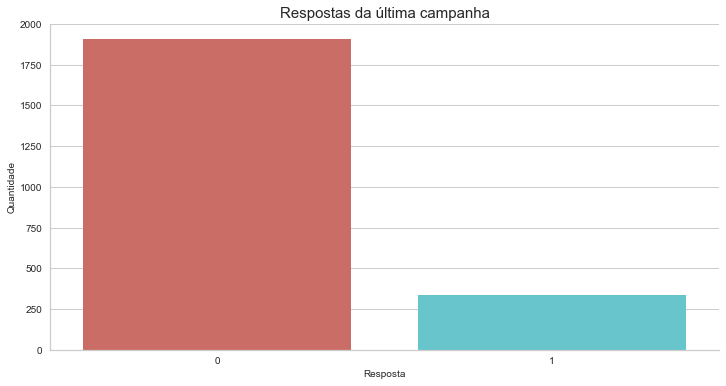

In [11]:
# Resultado da última campanha
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.countplot(data=df, x="Response", palette = 'hls')
ax.set_xlabel("Resposta", fontsize=10)
ax.set_ylabel("Quantidade", fontsize=10)
ax.set_title("Respostas da última campanha", fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

In [12]:
# Vendo em porcentagem
df["Response"].value_counts(normalize = True).round(2)

0    0.85
1    0.15
Name: Response, dtype: float64

Pelo resultado acima, percebe-se que só 15% do total aceitaram a oferta na última campanha.

**Observação:** O desbalanceamento dos dados deve ser tratado antes da criação do modelo caso contrário o modelo será tendencioso.

Vamos verificar em seguida o número de pessoas que responderam a cada campanha 

In [13]:
df.groupby(["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4",
              "AcceptedCmp5"]).agg({"Response":["count","sum"]})

Response     
                                                                    count  sum
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5              
0            0            0            0            0                1777  146
                                                    1                  59   21
                                       1            0                  84   11
                                                    1                  24   12
                          1            0            0                 129   55
                                                    1                   6    2
             1            0            0            0                   1    1
                                       1            0                   8    3
                                                    1                   4    2
                          1            0            0                   2    0
                                                    1                   2    2
1            0            0            0            0                  52   13
                                                    1                  21   14
                                       1            0                  14    6
                                                    1                  23   19
                          1            0            0                   8    5
                                                    1                  13   10
             1            0            1            0                   2    2
                                                    1                   8    7
                          1            0            1                   3    3

Surpreendentemente, 146 dos 1777 clientes que nunca aceitaram uma única oferta das campanhas anteriores, aceitaram a oferta na última campanha. Também, temos clientes que aceitaram múltiplas ofertas (Cmp1 e Cmp5, Cmp1 e Cmp4, Cmp1 e Cmp3, Cmp1 e Cmp2 e Cmp4, Cmp1 e Cmp3 e Cmp5) e alguns deles não aceitaram a última oferta.

In [14]:
# Quantidades de reclamações
df.groupby(["Complain"]).agg({"Complain":"count"})

Complain
Complain          
0             2219
1               21

Aproximadamente 1% dos clientes reclamaram. O que é bom, pois indica um serviço de qualidade. 

Percebi que o Dt_Customer (data de inscrição) não está em um formato de data. Então, foi convertido a data em um valor numérico em que 0 é a data mais antiga no conjunto de dados e o valor numérico atribuído a cada instância é o número de dias depois disso, ou seja, é o número de dias que se passaram desde que o cliente se inscreveu na plataforma.

In [15]:
# Conversão da data e determinação da senioridade 
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
mindate = df["Dt_Customer"].min()
df["Dt_Customer"] = (df["Dt_Customer"]-mindate).dt.days

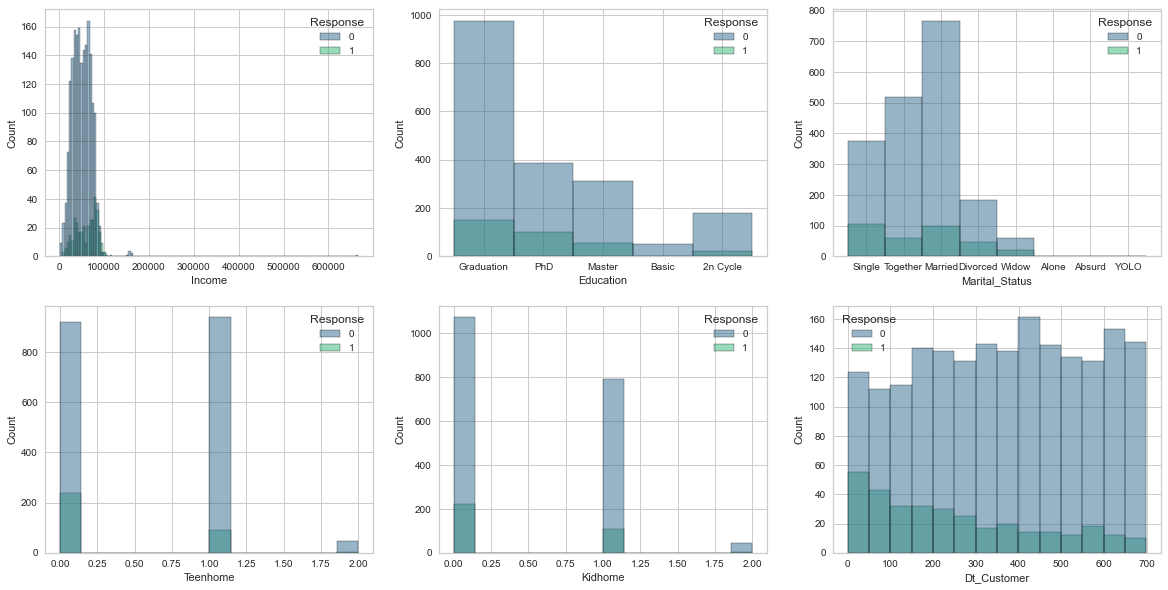

In [16]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = ["Income", "Education", "Marital_Status", "Teenhome", "Kidhome", "Dt_Customer" ]

a = 0

for i in cols:
  sns.histplot(data = df, x = i, hue = "Response", ax = axes[a], 
               palette = "viridis")
  a= a+1


No histograma da data de inscrição, é possível ver que se manteve quase constante. A empresa conseguiu atrair o mesmo número de clientes ao longo do tempo. Curiosamente, os clientes mais recentes não foram os mais suscetíveis a aceitar a última oferta.

O histograma de Income, retratando o perfil de renda do conjunto de dados, também apresenta informações interessantes. Parece que quanto maior a renda, maior a chance de comprar o gadget.

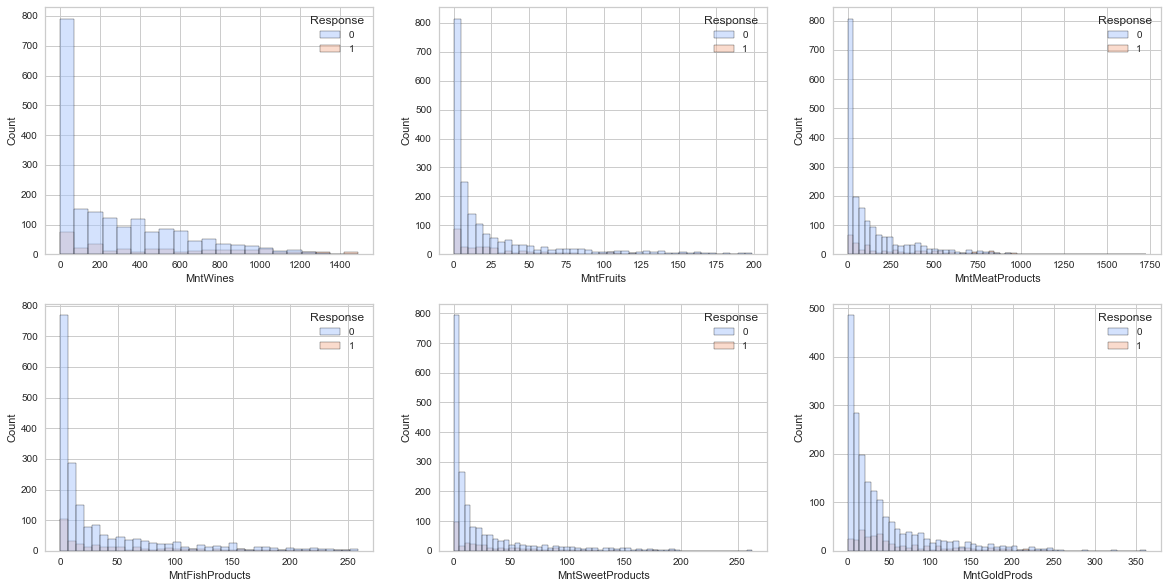

In [17]:
# Gráfico dos valores gastos por produto segmentado pela resposta à última campanha.
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6];a = 0

cols_2 = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

for i in cols_2:
  sns.histplot(data = df, x = i, hue = 'Response', ax = axes[a], 
               palette = 'coolwarm')
  a= a+1

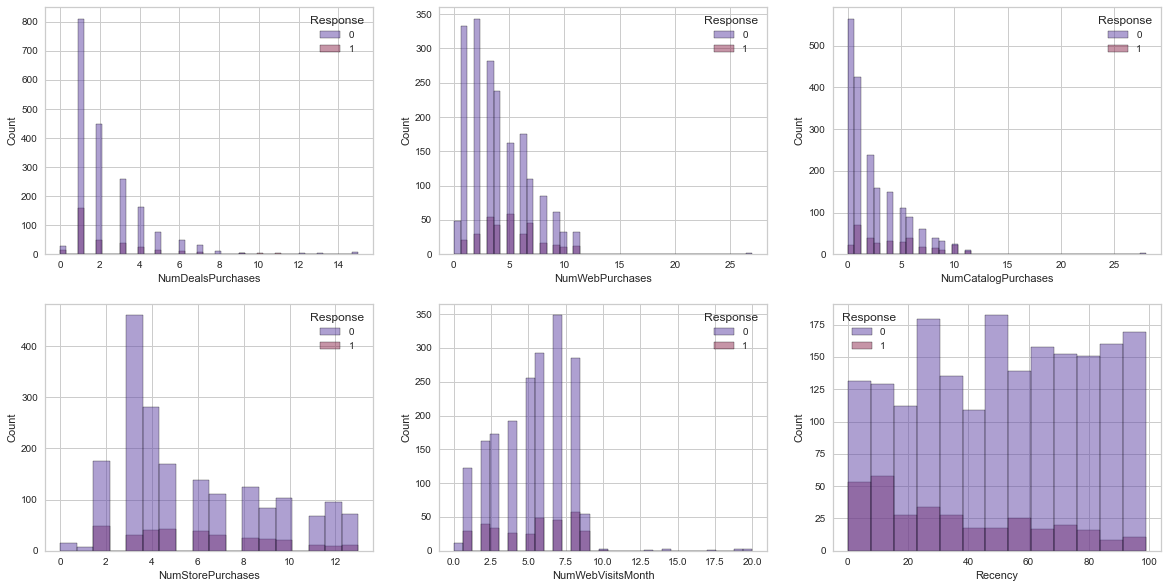

In [18]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6];a = 0

cols_3 = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Recency"]

for i in cols_3:
  sns.histplot(data = df, x = i, hue = "Response", ax = axes[a], 
               palette = "twilight")
  a= a+1

A variável Recency parece ter uma relação com a variável Response. Mais clientes compraram quando o tempo de recorrência é baixo do que quando estava alto.

## Limpeza e Transformação dos dados

Será preciso eliminar os dados nulos, outliers e criar novas features a partir das features do dataset

In [19]:
# Eliminando os valores nulos da coluna Income 
df = df.dropna()
print("Agora, temos um total de {}".format(len(df)), "observações")

Agora, temos um total de 2216 observações


In [20]:
# Obtenção dos atributos das variáveis Education e Marital.
for a in ["Education", "Marital_Status"]:
    
    # Lista de valores únicos
    n = df[a].unique()
    print(a)
    print(n)

Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [21]:
#Features engineering

#Cálculo da idade dos clientes
df["Age"] = 2022 - df["Year_Birth"]

#Total gasto considerando todos os produtos
df['Total_Gasto'] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])

# Quantidade de compras
df["PurchaseNum"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

# Total de crianças
df["Filhos"] = df["Kidhome"] + df["Teenhome"]

#Criando novos atributos com base no estado civil
df["Marital_Status"] = df["Marital_Status"].replace({"Married": "Casal", "Together":"Casal", "Alone": "Solteiro", "Absurd": "Solteiro", "Divorced": "Solteiro", "Widow": "Solteiro", "Single": "Solteiro", "YOLO": "Solteiro"})

In [22]:
# Eliminando as colunas redundantes e inúteis para as análises
df.drop(["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"], axis=1, inplace=True)

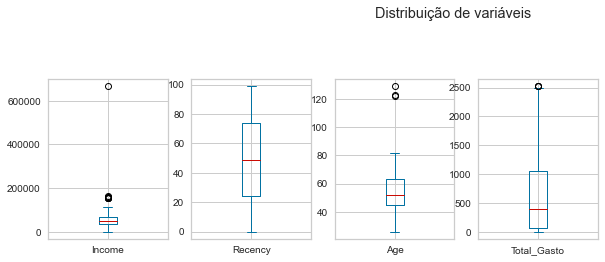

In [23]:
# Verificando a presença de outliers em algumas variáveis importantes 
import seaborn as sns
import matplotlib.pyplot as plt
to_plot = ["Income", "Recency", "Age", "Total_Gasto"]
box_charts = df[to_plot].plot(kind = 'box', figsize = (15,10), subplots = True, layout = (3,6), 
                              sharex = False, sharey = False, title = 'Distribuição de variáveis')
plt.show()

In [24]:
# Descartando os outliers
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print('Número de observações depois da eliminação dos outliers:', len(df))

Número de observações depois da eliminação dos outliers: 2212


## Visualização de dados 

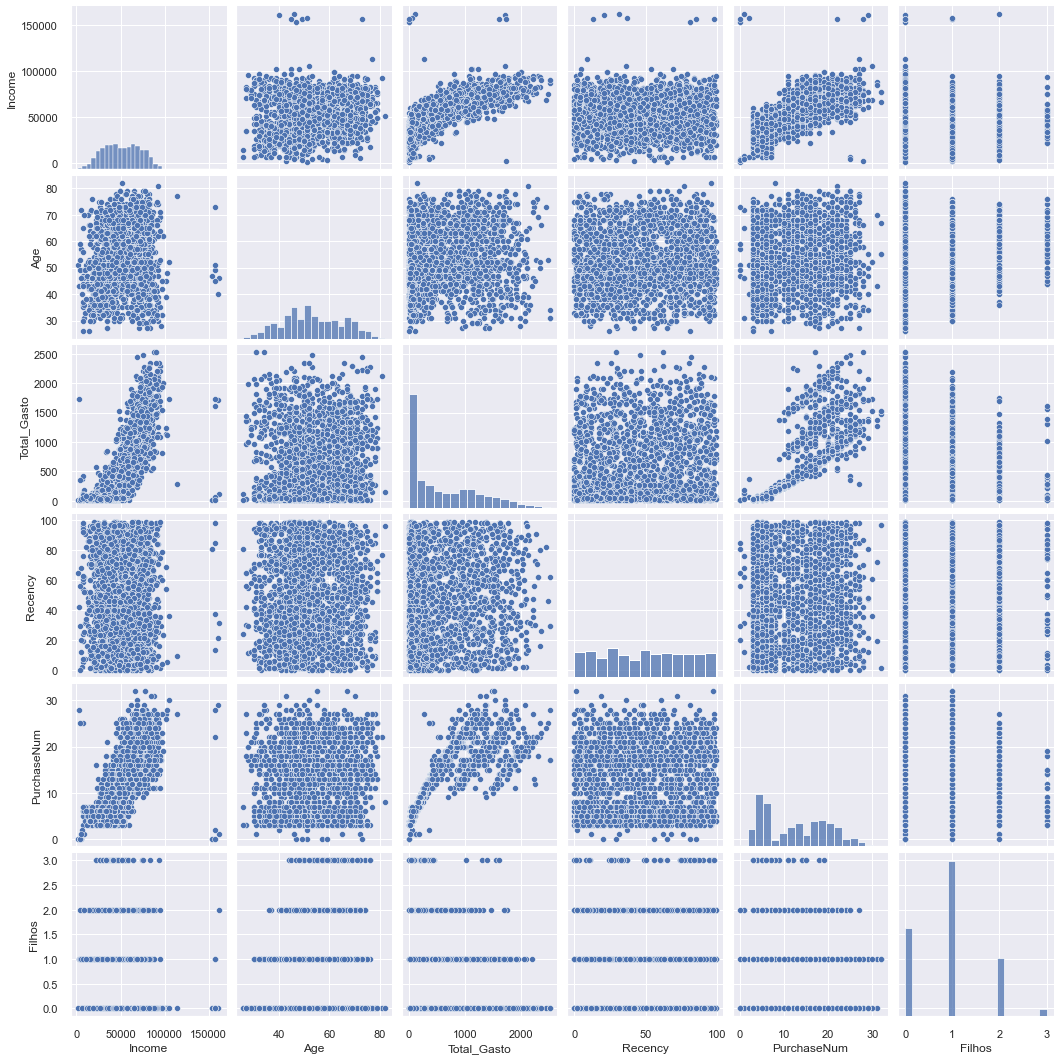

In [25]:
# Correlação entre algumas variáveis essenciais
cols_to_plot = ["Income", "Age", "Total_Gasto", "Recency", "PurchaseNum", "Filhos"]
sns.set_theme()

sns.pairplot(df[cols_to_plot])

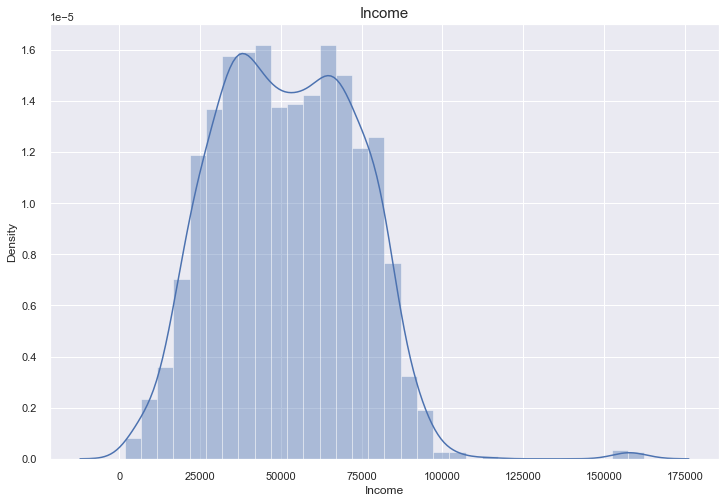

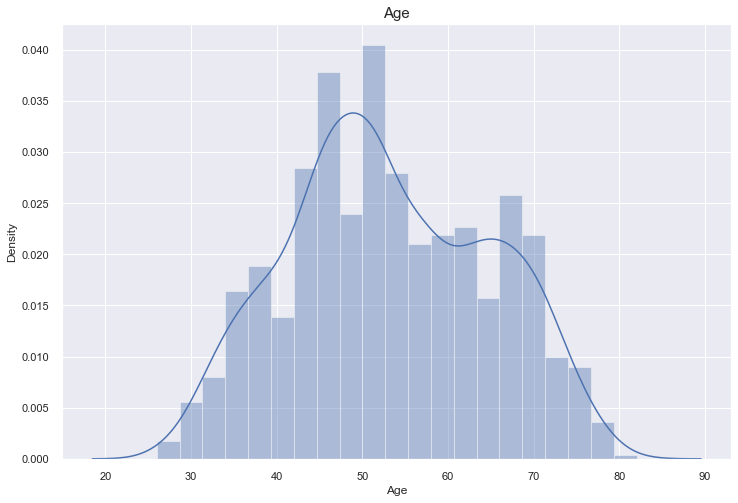

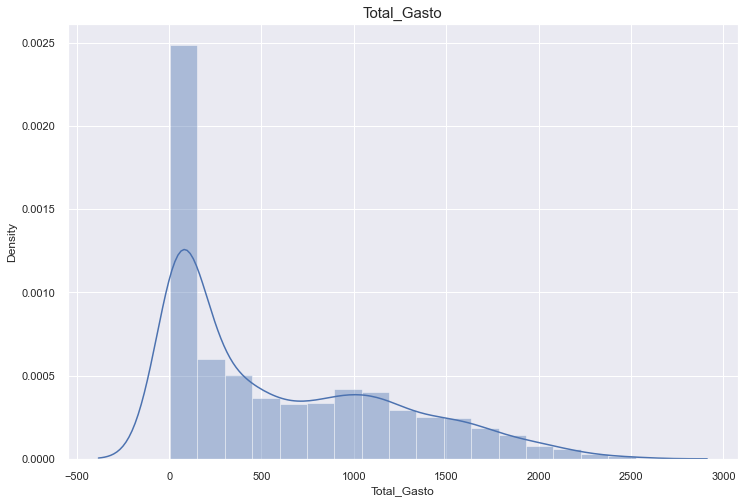

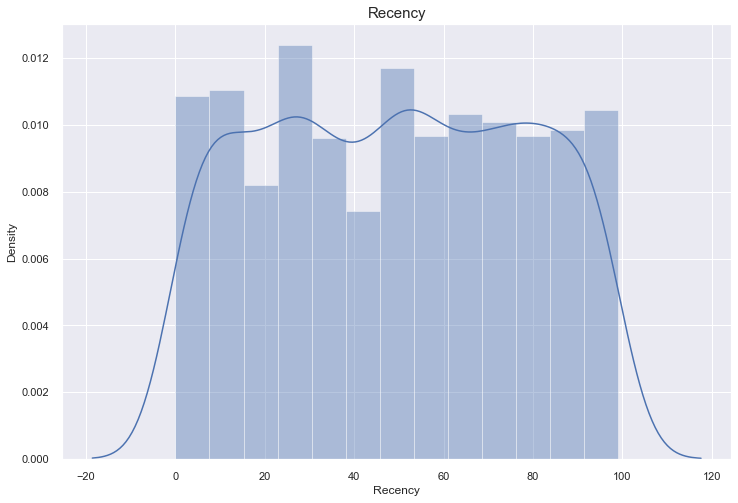

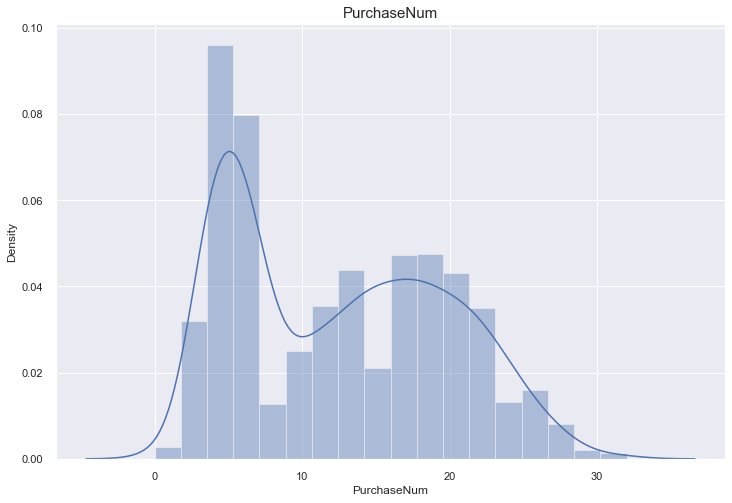

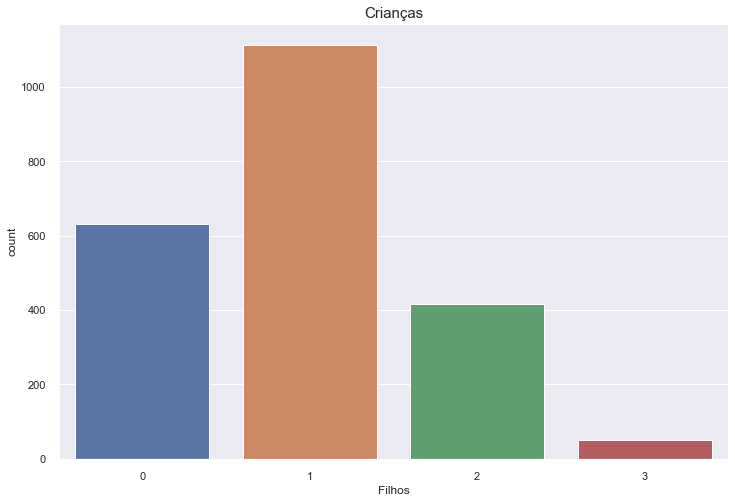

In [26]:
# Plotagem da distribuição das variáveis selecionadas anteriormente

cols_to_plot.remove("Filhos")

for col in cols_to_plot:
    plt.figure(figsize=(12, 8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()


plt.figure(figsize=(12, 8))
sns.countplot(df["Filhos"])
plt.title("Crianças", size=15)
plt.show()

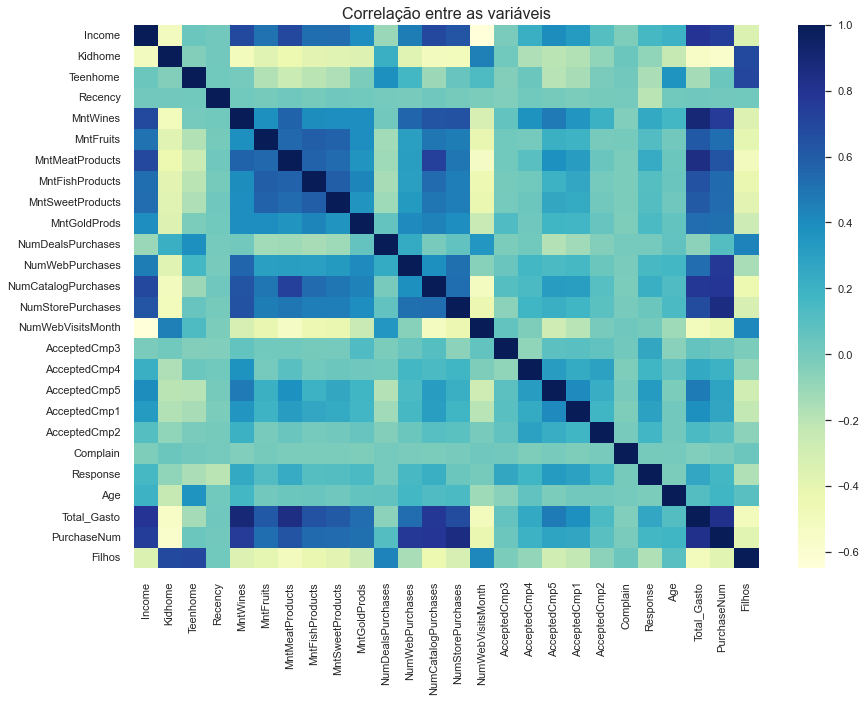

In [27]:
# Matrix de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.title("Correlação entre as variáveis", size=16)
plt.show()

# Processamento dos dados

In [28]:
# One-hot encoding (transformação de variável categoricas em numéricas)
X = df

cat_cols = X.select_dtypes(["object"]).columns
X = pd.get_dummies(X, columns=cat_cols)

In [29]:
# Standardization dos dados
num_cols = ["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 
"NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Total_Gasto", "PurchaseNum", "Age"]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

#### Redução da dimensionalidade 

A redução de dimensionalidade é o processo de redução do número de variáveis aleatórias em consideração, por meio da obtenção de um conjunto de variáveis principais.

#### Principal Component Analysis

A Análise de Componentes Principais (PCA) é uma técnica usada para Redução de Dimensionalidade. Ele combina as variáveis correlacionadas, cria o mesmo número de variáveis não correlacionadas entre si e compacta a maioria das informações nos primeiros componentes. Portanto, nos ajuda a lidar com a multicolinearidade que afeta os modelos de ML de maneira ruim.

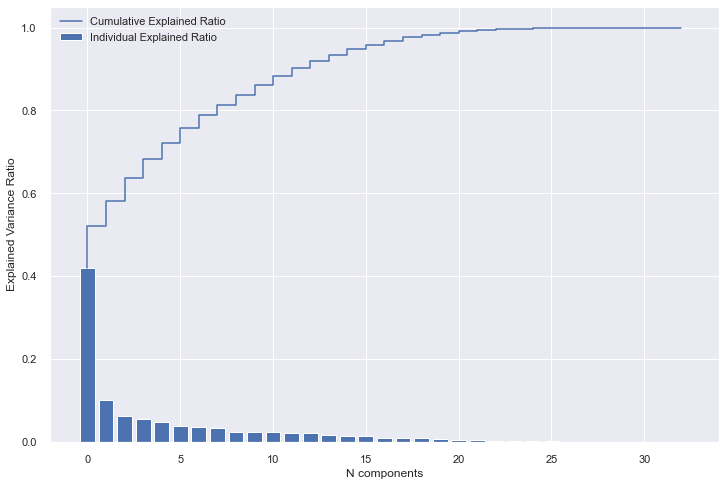

In [30]:
pca = PCA()
pca.fit(X)

# Soma cumulativa da variância
cum_sum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum)), cum_sum, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

Seria uma boa prática aqui selecionar e visualizar os 3 primeiros componentes, mesmo que eles tenham só um pouco mais da metade das informações.

In [31]:
pca = PCA(n_components = 3)
pca.fit(X)
X_pca = pd.DataFrame(pca.transform(X), columns=["col1", "col2", "col3"])

# Clusterização

Quanto ao número de clusters, vamos usar o KElbowVisualizer para determiná-los.

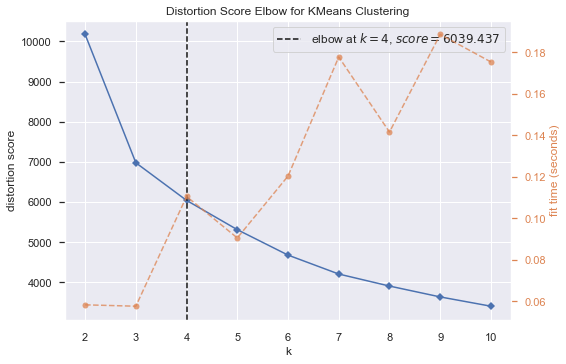

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

Pode-se ver claramente que o valor ideal para o parâmetro "n_clusters" é 4.

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X_pca)

Plotagem em 3D

In [34]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(X_pca, x="col1", y="col2", z="col3", color=predictions, title=f"Variância total: {total_var:.2f}%")
fig.show()

A variância total para os 3 primeiros componentes é de 58,19%. Então, opta-se por selecionar os 7 primeiros componentes porque eles representam aproximadamente 75% das informações presentes nos dados.

In [35]:
pca = PCA(n_components = 7)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X), columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7"])

In [36]:
total_var = pca.explained_variance_ratio_.sum() * 100
print("Variância total:",total_var)

Variância total: 75.73048031679093


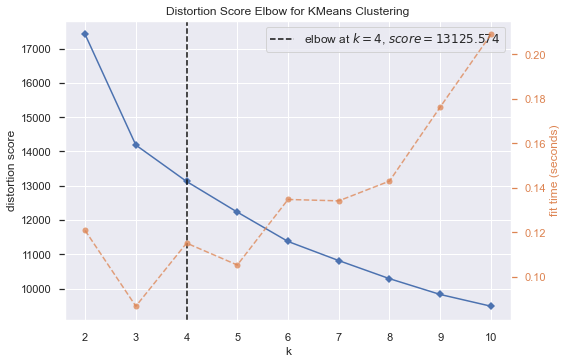

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# o KElbowVisualizer para dados de 7 dimensões
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

Parece que devemos continuar selecionando 4 clusters.

In [38]:
# Predição
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X_pca)

df["Clusters"] = predictions

## Análise do comportamento dos clientes

In [39]:
#Distribuição dos clusters
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

cluster0_num = df[df["Clusters"]==0].shape[0]
cluster1_num = df[df["Clusters"]==1].shape[0]
cluster2_num = df[df["Clusters"]==2].shape[0]
cluster3_num = df[df["Clusters"]==3].shape[0]
values = [cluster0_num, cluster1_num, cluster2_num, cluster3_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title="Clusters")])
fig.show()

**Observações:**

* Cluster 1 compõe a maior parte dos dados
* Cluster que ocupa menos é o Cluster 3

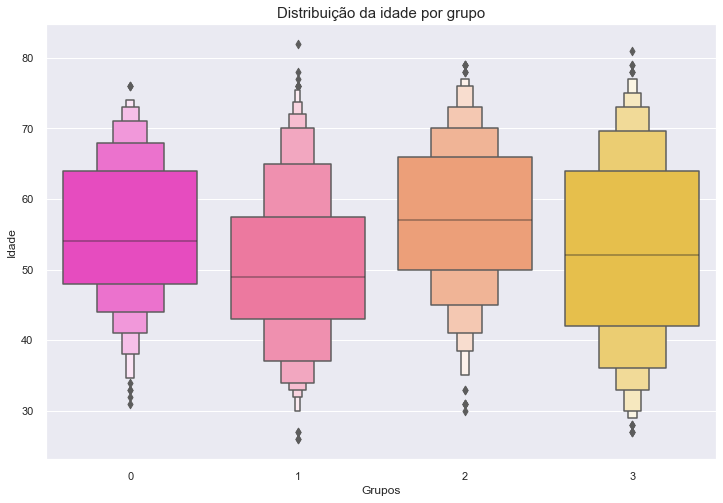

In [40]:
# Gráfico das idades
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["Age"], palette="spring")
plt.ylabel("Idade")
plt.xlabel("Grupos")
plt.title("Distribuição da idade por grupo", size=15)
plt.show()

**Observaçõess:**

* O grupo 0 inclui principalmente pessoas mais jovens (43-57 com a mediana em torno de 48)
* O grupo com as pessoas mais velhas é o grupo 3 (51-66)
* O grupo 1 inclui principalmente clientes de meia idade (41-65 com a mediana em torno de 52)

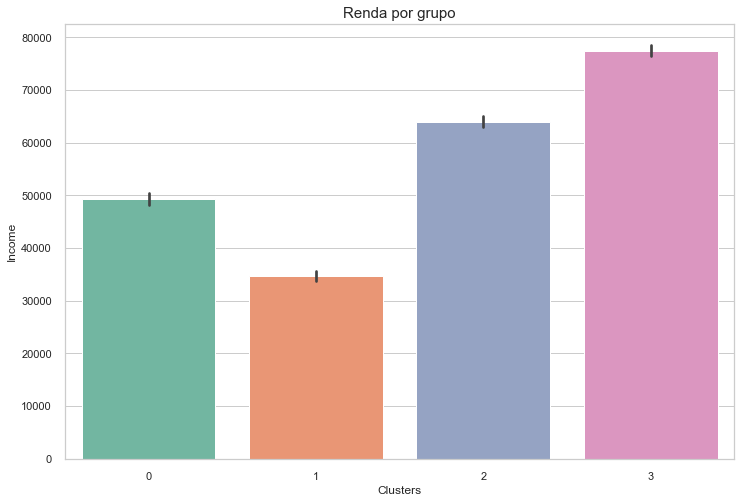

In [41]:
# Gráfico da renda por grupo
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Income"], palette="Set2")
plt.title("Renda por grupo", size=15)
plt.show()

**Observações:**

* O grupo com a maior renda é o grupo 3
* A renda do grupo 1 é relativamente menor do que a renda de outros

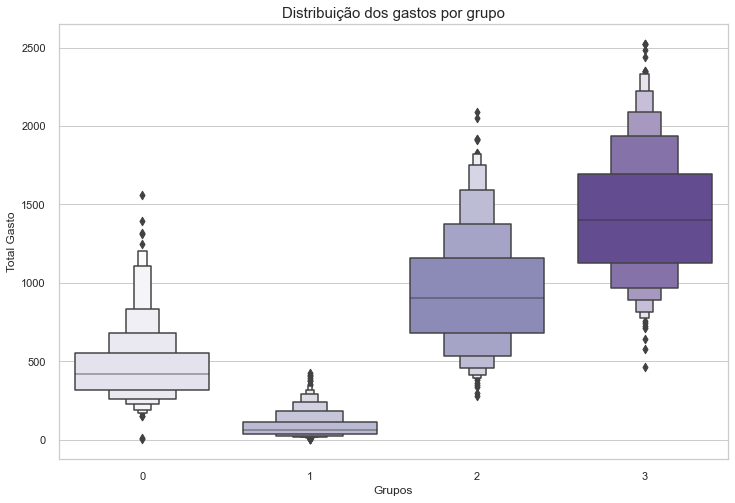

In [42]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["Total_Gasto"], palette='Purples')
plt.ylabel("Total Gasto")
plt.xlabel("Grupos")
plt.title("Distribuição dos gastos por grupo", size=15)
plt.show()

A partir do gráfico acima, pode-se ver claramente que o grupo 3 é o nosso maior conjunto de clientes, seguido de perto pelo grupo 2. Podemos explorar o que cada grupo está gastando para as estratégias de marketing direcionadas.

Vamos explorar a seguir como nossas campanhas se saíram no passado.

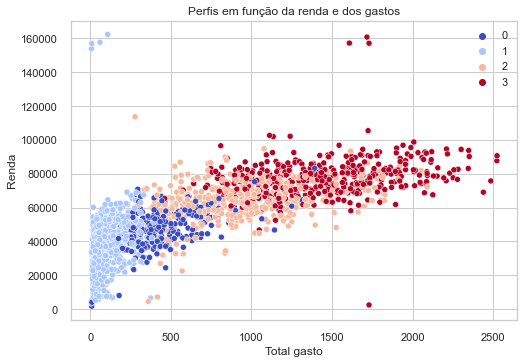

In [43]:
pl = sns.scatterplot(data = df,x=df["Total_Gasto"], y=df["Income"],hue=df["Clusters"], palette= "coolwarm")
pl.set_title("Perfis em função da renda e dos gastos")
plt.ylabel('Renda')
plt.xlabel('Total gasto')
plt.legend()
plt.show()

O gráfico de renda versus gasto mostra o padrão de clusters:

* grupo 0: baixo gasto e renda média
* grupo 1: baixo gasto e renda baixa
* grupo 2: gasto médio e renda alta
* grupo 3: alto gasto e alta renda

Em seguida, será examinado a distribuição detalhada dos grupos de acordo com os vários produtos. 

In [44]:
liste = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Clusters"]
plot_prod = df[liste]
fig = px.parallel_coordinates(data_frame = plot_prod, color = "Clusters", color_continuous_scale = 'matter')
fig.show()

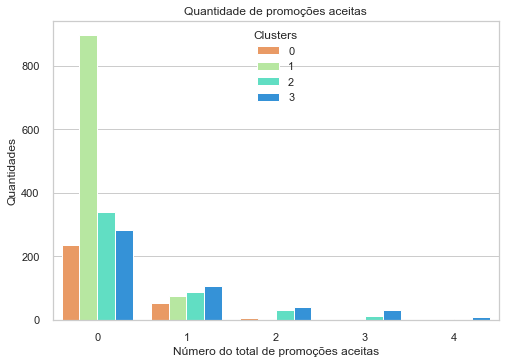

In [45]:
# Soma das ofertas
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

#Gráfico de total de ofertas aceitas.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= 'rainbow_r')
pl.set_title("Quantidade de promoções aceitas")
pl.set_xlabel("Número do total de promoções aceitas")
plt.ylabel('Quantidades')
plt.show()

Não houve uma resposta impressionante às campanhas. Muito poucos participantes no geral. Além disso, nenhum grupo participou de todas as 5. São necessárias campanhas mais bem direcionadas e bem planejadas para aumentar as vendas.

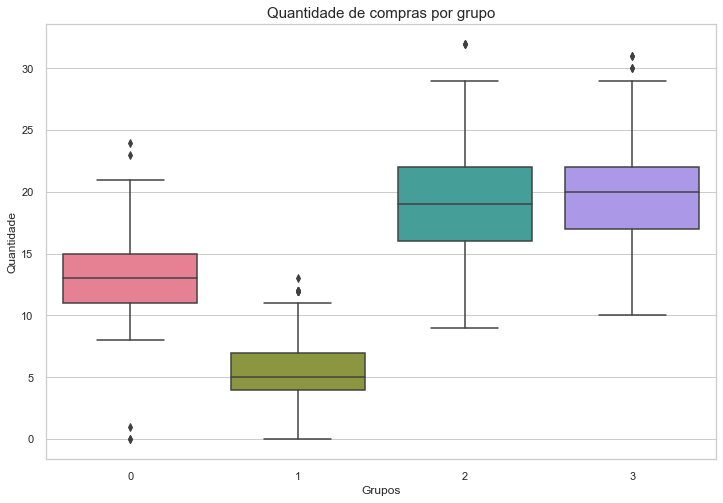

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["PurchaseNum"], palette='husl')
plt.ylabel('Quantidade')
plt.xlabel('Grupos')
plt.title("Quantidade de compras por grupo", size=15)
plt.show()

**Observações:**

* O grupo 3 tem o maior número de compras
* O grupo 1 faz menos compras

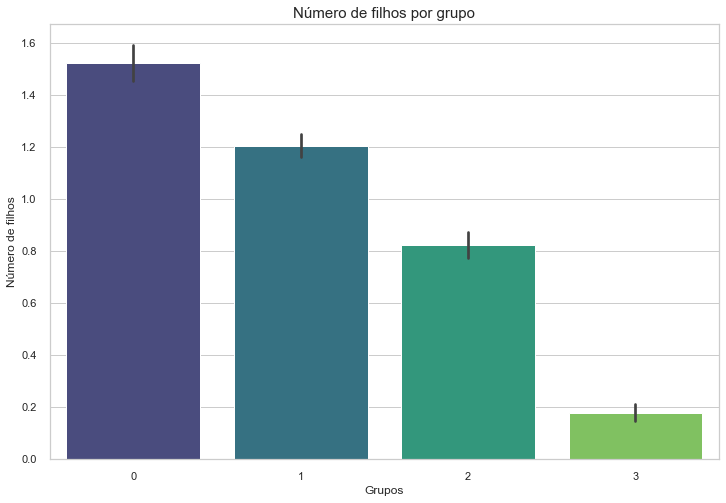

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot( df["Clusters"], y=df["Filhos"], palette='viridis')
plt.title("Número de filhos por grupo", size=15)
plt.xlabel('Grupos')
plt.ylabel("Número de filhos")
plt.show()

**Observations:**

* Grupo 3 tem pouquissímos filhos
* O grupo 0 tem mais filhos 

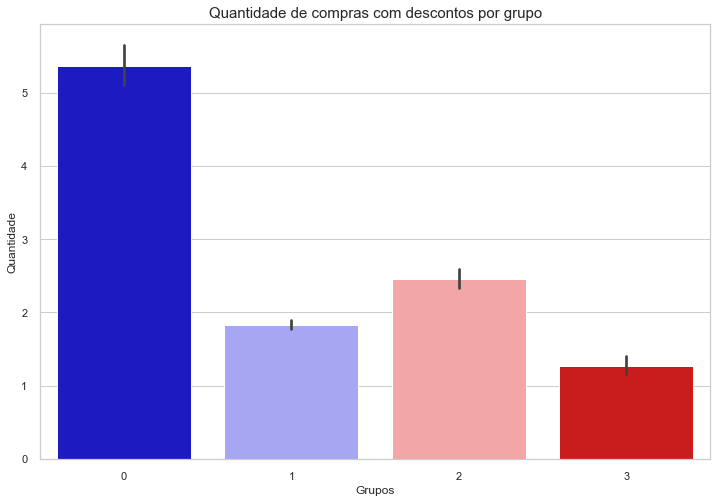

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["NumDealsPurchases"], palette='seismic')
plt.title("Quantidade de compras com descontos por grupo", size=15)
plt.ylabel("Quantidade")
plt.xlabel("Grupos")
plt.show()

**Observations:**
* O grupo 3 se beneficia menos dos descontos
* O grupo 0 possui o maior número de compras com desconto

## Conclusiões

**Grupo 0:**
* Tem a maioria dos filhos
* É o que mais compra quando há desconto

**Grupo 1:**
* É o mais jovem
* É o que menos ganha
* Tem tendência a gastar menos dinheiro
* Tem o menor número de compra

**Grupo 2:**
* É o grupo mais antigo

**Grupo 3:**
* Tem a maior renda
* Gasta mais dinheiro
* Tem o maior número de compra
* Tem o menor número de filhos
* É o que menos beneficia de descontos

### Sugestões para equipe de Marketing 

* **O grupo 1** ganha menos dinheiro e gasta menos dinheiro. Portanto, deve-se coletar as informações sobre a localização e aumentar as taxas de desconto nas lojas localizadas nesses locais. Além disso, este é o grupo mais jovem e é por isso que as lojas situadas nesses locais devem incluir mercadorias **adequadas** para os jovens.

* **O grupo 0** é o segundo grupo mais velho e as pessoas nesse agrupamento têm o maior número de filhos. Pode-se observar também que eles gastam menos dinheiro. É preciso que sejam oferecidos descontos particularmente em produtos alimentares infantis (doces, chocolates, etc..) nas lojas perto dos locais onde essas pessoas moram para estimulá-las, pois são pais, possivelmente aumentaria o número de vendas.

## Modelo de classificação

Vale salientar que os dados já foram normalizados anteriormente, então não será necessário fazer isso. Antes de usar os modelos de classificação, é essencial que seja corrigido o deslanceamento das classes da variável target.

Também, vamos dividir os dados transformados em duas partes: treino e teste. A ideia por trás da divisão dos dados é que possamos medir a acurácia do modelo com dados não vistos.

Amostras de treinamento: são amostras do conjunto de dados usado para treinar o modelo. Vamos usar 70% dos dados. Amostras de teste: são amostras usadas para medir a precisão ou desempenho do modelo. Vamos usar 30% dos dados.

In [49]:
#Bibliotecas necessárias para construção dos modelos
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [50]:
# Separando as features e a variável target
features_Scaled = X.drop("Response", axis = 1) 
target = X.Response # variável que queremos prever

Vamos determinar dentre as features quais delas são as mais importantes para predizer a resposta e usar essa lista para compor um novo dataset que será utilizado para criação do modelo. Para tal, será usado o RandomForestRegressor

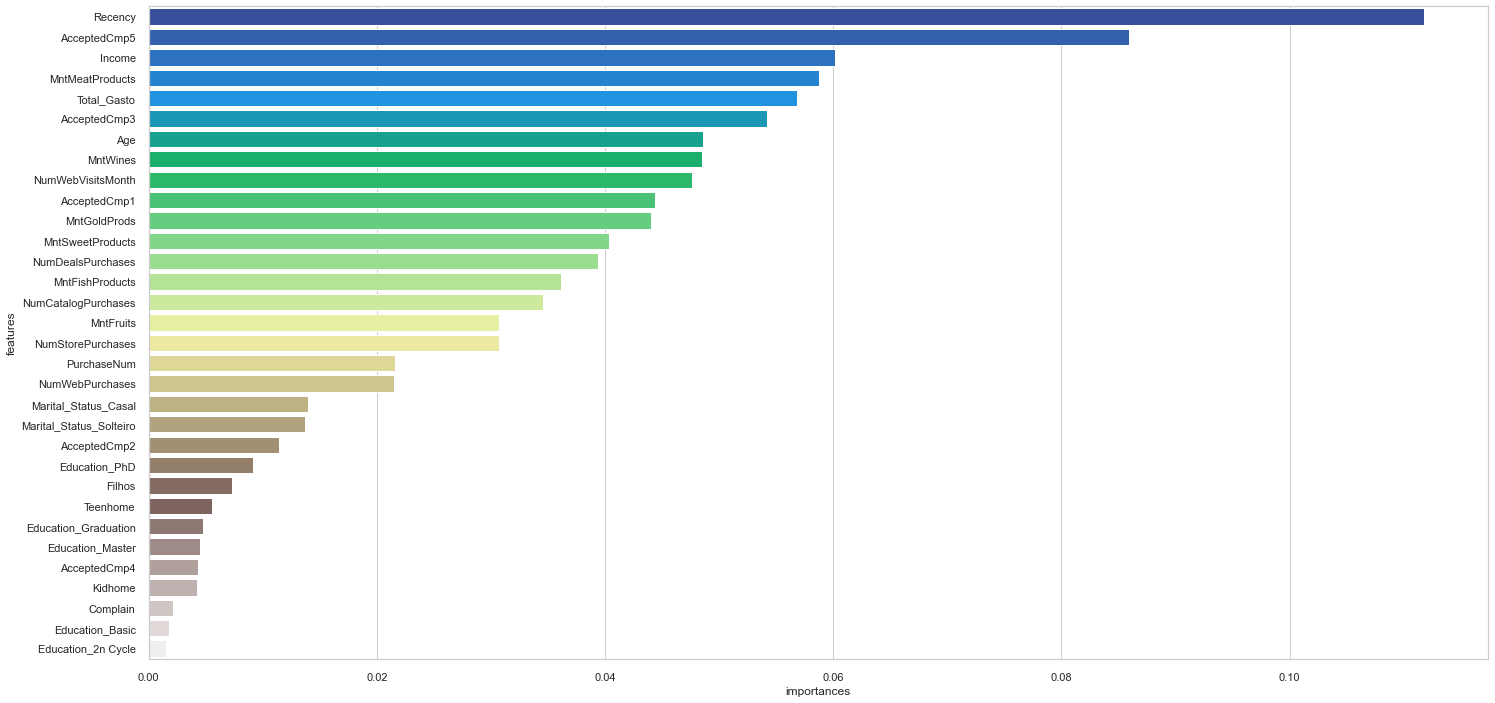

In [51]:
# Features importance

model = RandomForestRegressor(n_estimators=100,max_depth=50)
model.fit(features_Scaled, target)
features = features_Scaled.columns
importances = model.feature_importances_
rfg_imp = pd.DataFrame()

rfg_imp['features'] = features;rfg_imp['importances'] = importances
plt.figure(figsize=(24, 12));ax1 = plt.subplot(1,1,1)
sns.barplot(data = rfg_imp.sort_values(by=['importances'],ascending=False), 
            x='importances',y='features',ax=ax1,palette = 'terrain')

aux = rfg_imp.sort_values(by=['importances'],ascending=False)
rfg_features = aux.features[:20].to_list()
#Criando um dataset com as 20 features mais importantes para construção dos modelos
model_df = features_Scaled[rfg_features]

Vamos aplicar o SMOTE (Synthetic Minority Over-sampling Technique) para balancear a classe minoritária

In [52]:
smt = SMOTE(random_state=42)

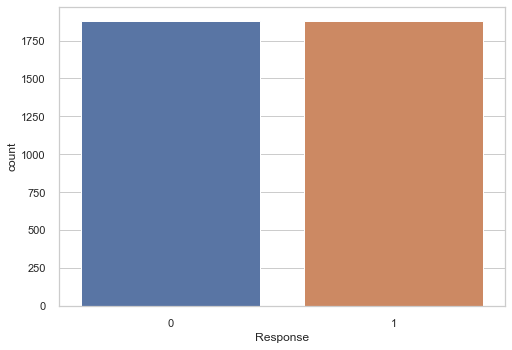

In [53]:
# Resampling
X, y = smt.fit_resample(model_df, target)
ax = sns.countplot(x=y)

Agora que os dados estão balanceados, vamos dividir em train e test.

In [54]:
# Separando dados de treino e teste do dataset balanceado
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

## Regressão logística

In [55]:
# Treinando o algoritmo
lr = LogisticRegression(random_state=42)
lr_model = lr.fit(X_train, y_train)

In [56]:
# Predizendo o resultado
y_pred = lr_model.predict(X_test)

In [57]:
# Comparando o resultado predito com o resultado real e checando a acurácia do modelo
accuracy_score(y_test, y_pred).round(2)

0.81

In [58]:
# Métricas de qualidade
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       562
           1       0.82      0.80      0.81       566

    accuracy                           0.81      1128
   macro avg       0.81      0.81      0.81      1128
weighted avg       0.81      0.81      0.81      1128



In [59]:
#matriz de confusão
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1   All
Real                   
0        463   99   562
1        113  453   566
All      576  552  1128


## Decision Tree

In [60]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

In [61]:
# Treinando o algoritmo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [62]:
# Predizendo o resultado
predict = clf.predict(X_test)

In [63]:
# Comparando o resultado predito com o resultado real e checando a acurácia do modelo
accuracy_score(y_test,predict).round(2)

0.79

In [64]:
# Mérticas de qualidade
print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80       562
           1       0.83      0.74      0.78       566

    accuracy                           0.79      1128
   macro avg       0.80      0.79      0.79      1128
weighted avg       0.80      0.79      0.79      1128



In [65]:
#matriz de confusão
print (pd.crosstab(y_test, predict, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1   All
Real                   
0        475   87   562
1        145  421   566
All      620  508  1128


## Gaussian Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [67]:
# Treinando e predizendo o resultado
y_predict = gnb.fit(X_train, y_train).predict(X_test)

In [68]:
# Comparando o resultado predito com o resultado real e checando a acurácia do modelo
accuracy_score(y_test,y_predict).round(2)

0.69

In [69]:
# Mérticas de qualidade
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       562
           1       0.74      0.60      0.66       566

    accuracy                           0.69      1128
   macro avg       0.70      0.69      0.69      1128
weighted avg       0.70      0.69      0.69      1128



In [70]:
#matriz de confusão
print (pd.crosstab(y_test, y_predict, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1   All
Real                   
0        442  120   562
1        227  339   566
All      669  459  1128
